In [2]:
!pip install opencv-python-headless
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,379 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [73]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
from textblob import TextBlob

In [53]:
# Load images
image1 = cv2.imread('/content/drive/MyDrive/Data/Task1/1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Data/Task1/2.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Data/Task1/3.jpg')
img = [image1, image2, image3]

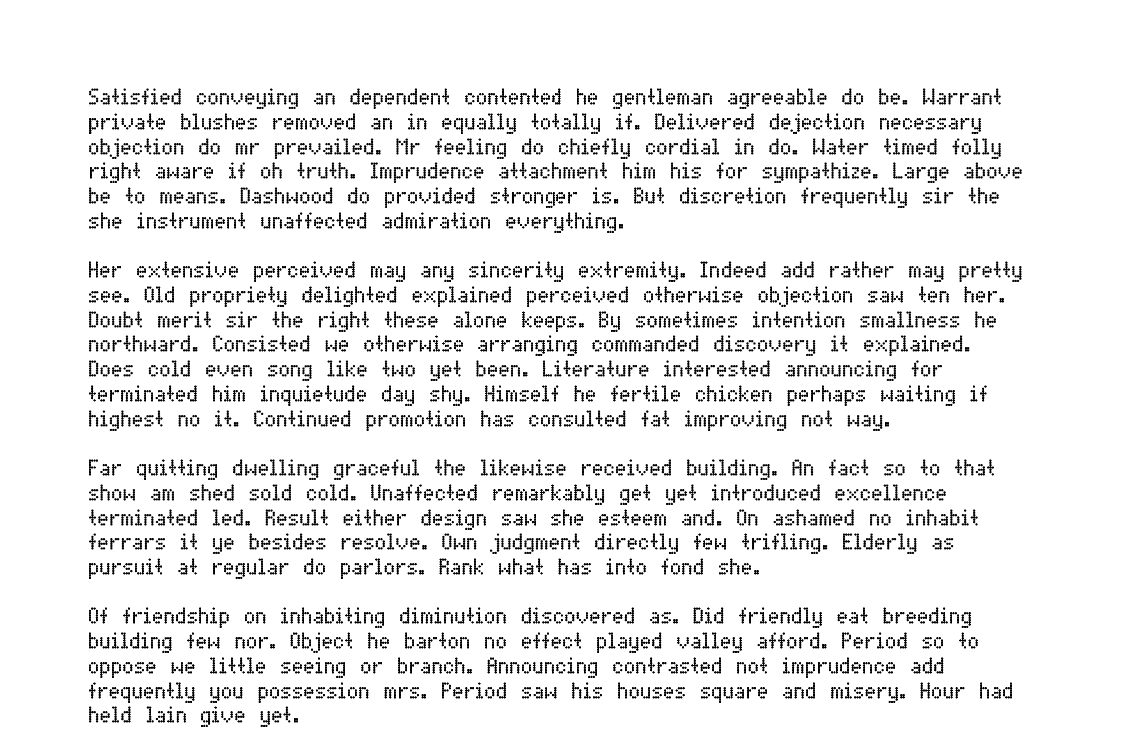

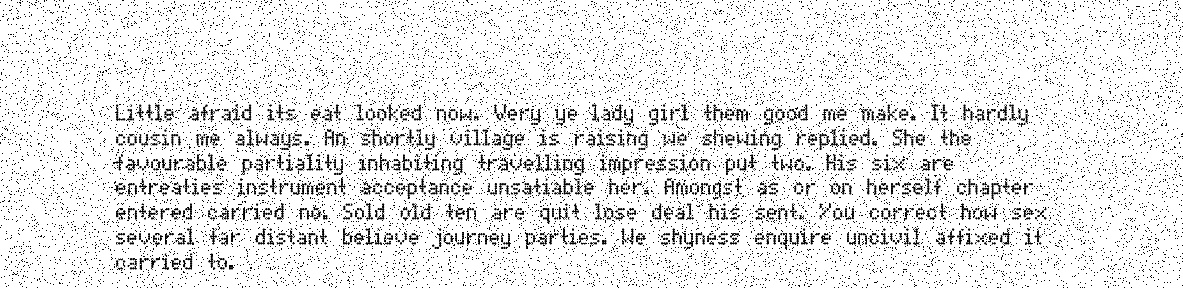

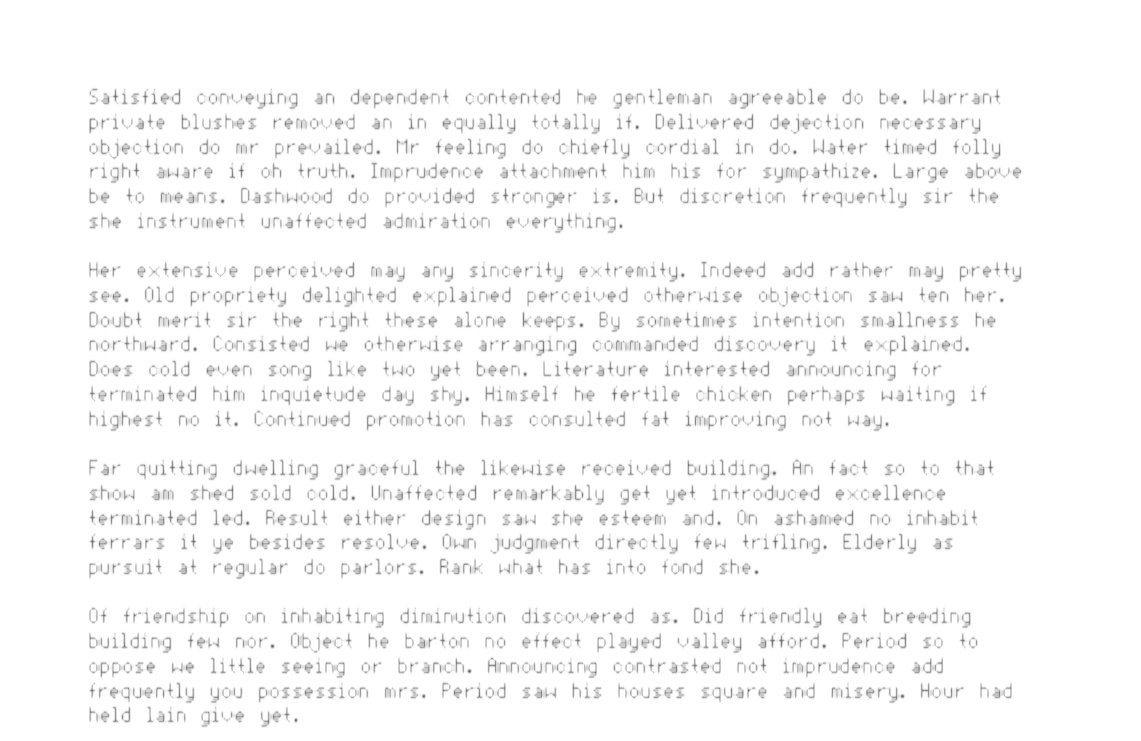

In [84]:
#display raw images
for i in img:
  cv2_imshow(i)

In [83]:
kernel = np.ones((1, 1), np.uint8)
texts = []
denoise = []
for image in img:
    # Resize for better OCR accuracy
    dilated = cv2.dilate(image, kernel, iterations = 1)
    eroded = cv2.erode(dilated, kernel, iterations = 1)
    morphed = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
    denoised = cv2.medianBlur(morphed, 3)
    denoise.append(denoised)
    # Perform OCR on the image
    text = pytesseract.image_to_string(denoised)
    texts.append(text)
    print(" ''' ", text," ''' ", "\n")

 '''  Satisfied conveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejection necessary
objection do mr prevailed. Mr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means, Dashwood do provided stronger is. But discretion frequently sir the
she instrument unattected admiration everything,

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see, Old propriety delighted explained perceived otherwise objection saw ten her.
Qoubt merit sir the right these alone keeps, By sometimes intention smallness he
northward. Consisted we otherwise arranging commanded discovery it explained.
Qoes cold even song like two yet been, Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps waiting if
highest no it, Continued promotion has consulted fat impr

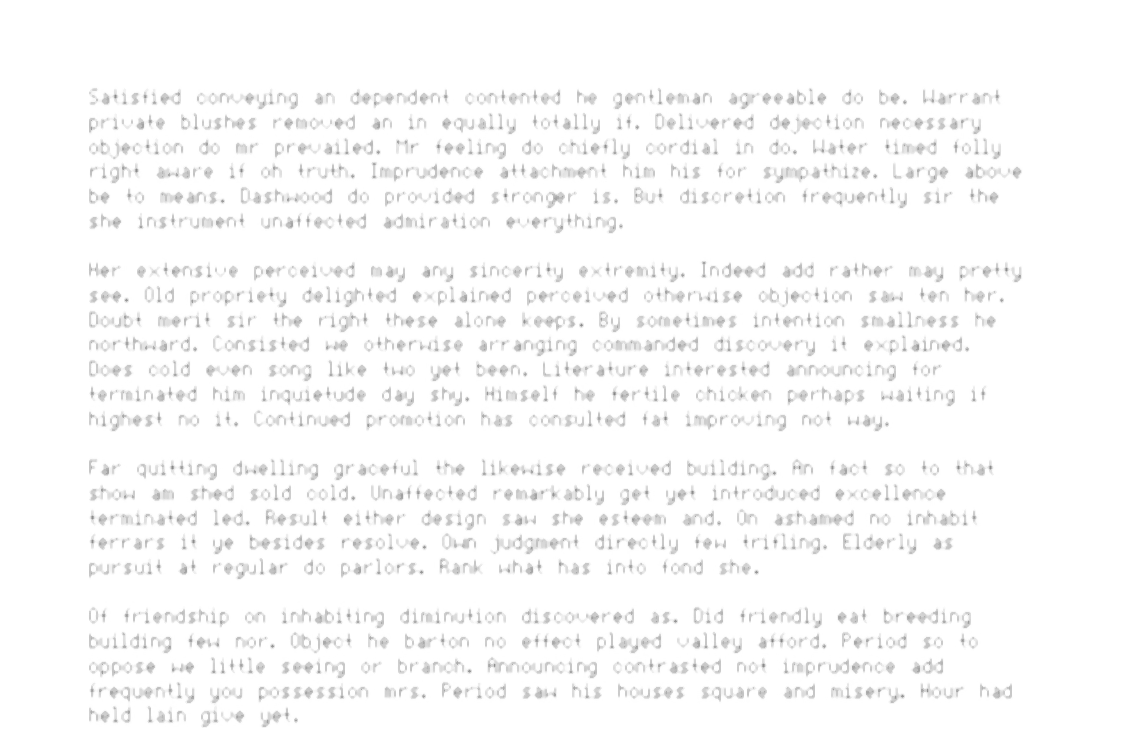

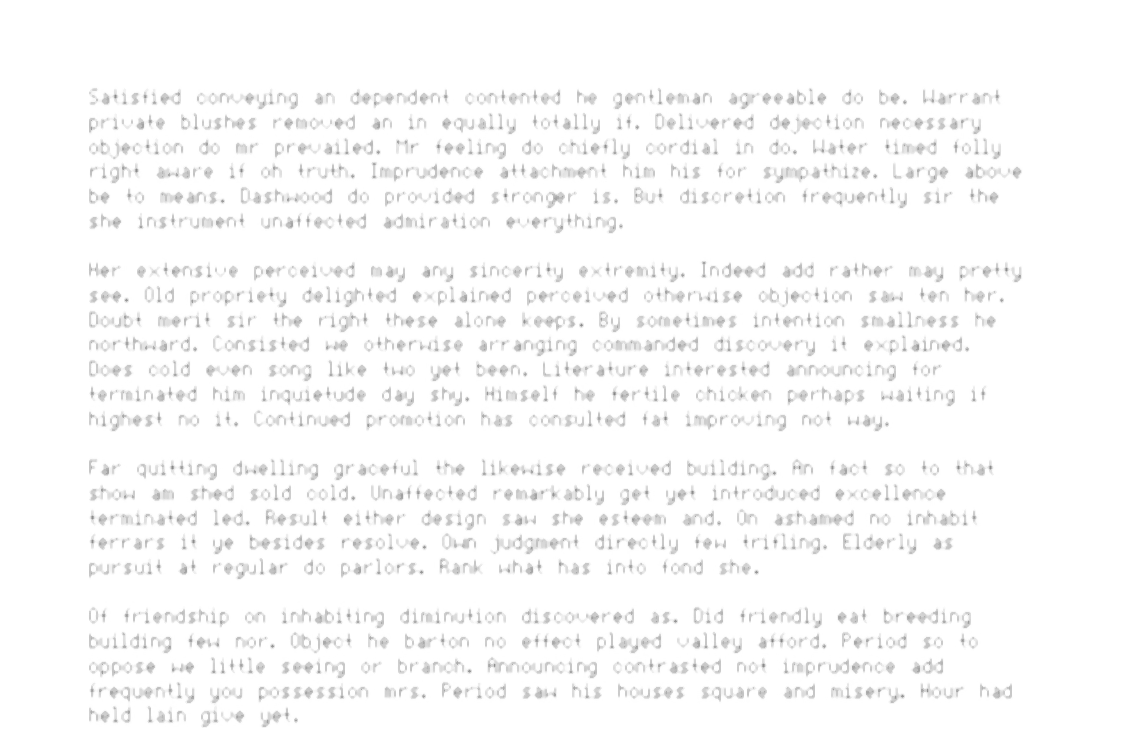

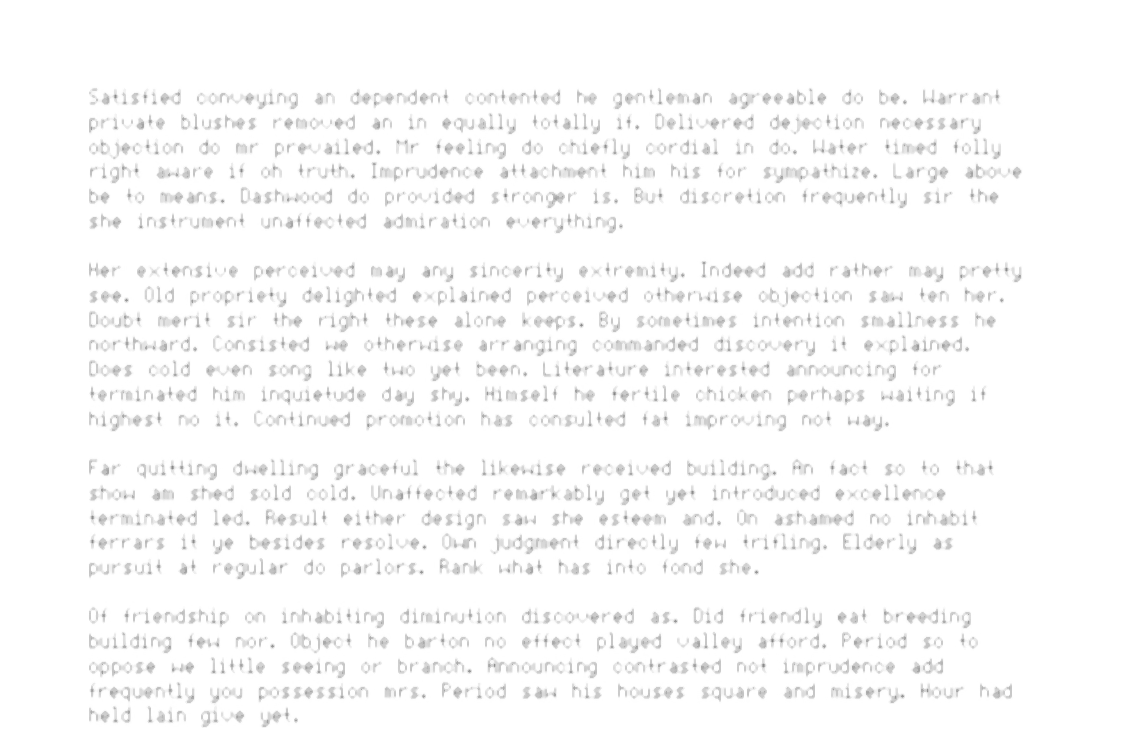

In [81]:
#for displaying the preprocessed images
for d in denoise:
    cv2_imshow(denoised)

In [82]:
# Clean up the text
for text in texts:
    # Clean up the text
    text = text.strip()

    # Create a TextBlob object
    blob = TextBlob(text)

    # Correct the spelling
    corrected = blob.correct()

    # Display the corrected text
    print(" ''' ",corrected, " ''' ", "\n\n\n")

 '''  Satisfied conveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejection necessary
objection do mr prevailed. Or feeling do chiefly cordial in do. Later timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means, Dashwood do provided stronger is. But discretion frequently sir the
she instrument unaffected admiration everything,

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see, Old propriety delighted explained perceived otherwise objection saw ten her.
Doubt merit sir the right these alone keeps, By sometimes intention stillness he
northward. Consisted we otherwise arranging commanded discovery it explained.
Does cold even song like two yet been, Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps waiting if
highest no it, Continued promotion has consulted fat impr